In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current 

df_train = pd.read_csv(os.path.join(dirname, '/kaggle/input/titanic/train.csv'))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Quantos passageiros estavam no Titanic? 

In [5]:
df_train["PassengerId"].count()

891

# Qual a distribuição de passageiros nas diferentes classes? 

<AxesSubplot:xlabel='Pclass'>

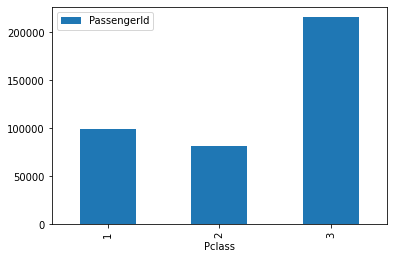

In [6]:
df_train[["PassengerId", "Pclass"]].groupby(['Pclass']).sum().plot.bar()

# Quantos homens e mulheres embarcaram no titanic? 

In [7]:
df_train[["PassengerId", "Sex"]].groupby("Sex").count()

,PassengerId
Sex,
female,314
male,577


# Quantas crianças embarcaram? 

In [8]:
df_train[df_train["Age"] < 18]["PassengerId"].count()

113

### PS: Foi utilizado a regra > 18 anos = criança, pois os valores de parch contemplam tanto adultos sem filhos, quanto crianças acompanhadas por bábás.

# Elabore um gráfico de boxplot com a idade das mulheres. 

<AxesSubplot:title={'center':'Age'}, xlabel='Sex'>

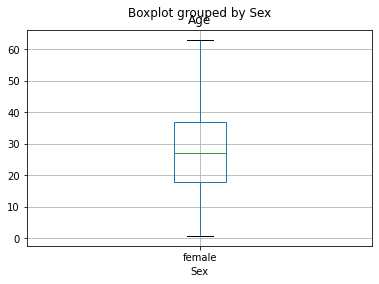

In [10]:
df_train[df_train["Sex"] == "female"].boxplot(column='Age', by="Sex")

# Elabore um gráfico de boxplot com a idade dos homens.

<AxesSubplot:title={'center':'Age'}, xlabel='Sex'>

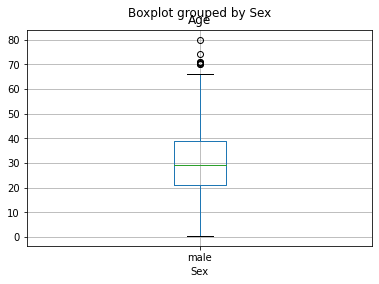

In [11]:
df_train[df_train["Sex"] == "male"].boxplot(column='Age', by="Sex")

# Elabore uma tabela com a quantidade de passageiros por classe. 

In [12]:
df_train[["PassengerId", "Pclass"]].groupby("Pclass").count()

,PassengerId
Pclass,
1,216
2,184
3,491


# Realize uma análise estatística com a idade dos passageiros mostrando o mínimo, médio, máximo e desvio padrão. 

In [13]:
df_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# Há outliers na idade dos pacientes da classe 1 ? Qual a idade do paciente mais velho ? Qual a idade do paciente mais novo? 

In [14]:
df_firstClass = df_train[df_train["Pclass"] == 1]
df_firstClass

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [15]:
df_zscore = df_firstClass.copy()
df_zscore["col_zscore"] = (df_firstClass["Age"] - df_firstClass["Age"].mean())/df_firstClass["Age"].std(ddof=0)
df_zscore[(df_zscore["col_zscore"] > 3) | (df_zscore["col_zscore"] < -3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,col_zscore


<AxesSubplot:title={'center':'Age'}, xlabel='Pclass'>

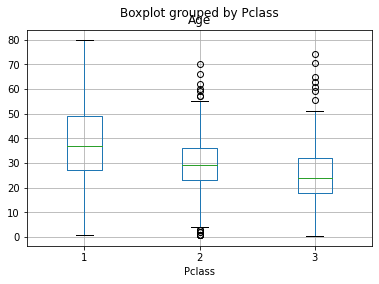

In [16]:
df_train.boxplot(column='Age', by="Pclass")

# Faça um boxplot com a idade dos sobreviventes. Há outliers? 

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

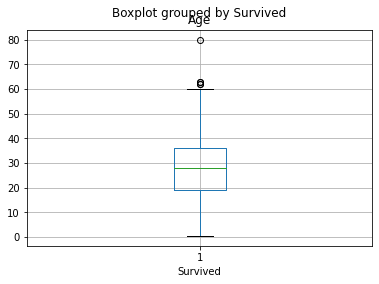

In [17]:
df_train[df_train["Survived"] == 1].boxplot(column='Age', by="Survived")

# Quais os fatores que aumentaram as chances de sobrevivência no Titanic? 

In [18]:
df_train_sex = pd.get_dummies(df_train["Sex"])
df_train_pclass = pd.get_dummies(df_train["Pclass"])

In [19]:
df_train_sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [20]:
df_corr=pd.concat([df_train[["Survived", "Age", "SibSp", "Parch", "Fare"]], df_train_sex, df_train_pclass], axis=1)
df_corr.corr()

,Survived,Age,SibSp,Parch,Fare,female,male,1,2,3
Survived,1.000000,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.285904,0.093349,-0.322308
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.348941,0.006954,-0.312271
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.054582,-0.055932,0.092548
Parch,0.081629,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.017633,-0.000734,0.015790
Fare,0.257307,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.591711,-0.118557,-0.413333
female,0.543351,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.098013,0.064746,-0.137143
male,-0.543351,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.098013,-0.064746,0.137143
1,0.285904,0.348941,-0.054582,-0.017633,0.591711,0.098013,-0.098013,1.000000,-0.288585,-0.626738
2,0.093349,0.006954,-0.055932,-0.000734,-0.118557,0.064746,-0.064746,-0.288585,1.000000,-0.565210
3,-0.322308,-0.312271,0.092548,0.015790,-0.413333,-0.137143,0.137143,-0.626738,-0.565210,1.000000
